# Portfolio Analysis of Materials sector

### Stocks under observation:

    - Newmont Corp. (NYSE:NEM)
    - FMC Corp. (NYSE:FMC)
    - Rio Tinto (NYSE:RIO) 
    - Lyondellbasell (NYSE:LYB)
    - International Paper (NYSE:IP)
    - Sherwin-Williams Co. (NYSE:SHW)


In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Pulling stock data 

In [2]:
materials = ['NEM', 'FMC', 'RIO', 'LYB','IP', 'SHW' ]
data = pd.DataFrame()
for i in range(len(materials)):
    
    df = wb.DataReader(materials[i], data_source='yahoo', start='2020-1-1')
    df['stock'] = materials[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,FMC,IP,LYB,NEM,RIO,SHW
Date,,,,,,
2020-01-02,99.306427,44.973652,92.469971,43.098328,57.082085,570.391357
2020-01-03,98.660164,44.183258,90.194183,42.709427,56.081314,563.010315
2020-01-06,97.795158,43.422497,89.957733,43.138214,55.709599,561.972900
2020-01-07,99.574883,42.958138,89.573509,43.108299,55.652412,558.930725
2020-01-08,99.873154,43.462017,89.199142,41.961540,56.138504,567.828003


Text(0, 0.5, 'price in $')

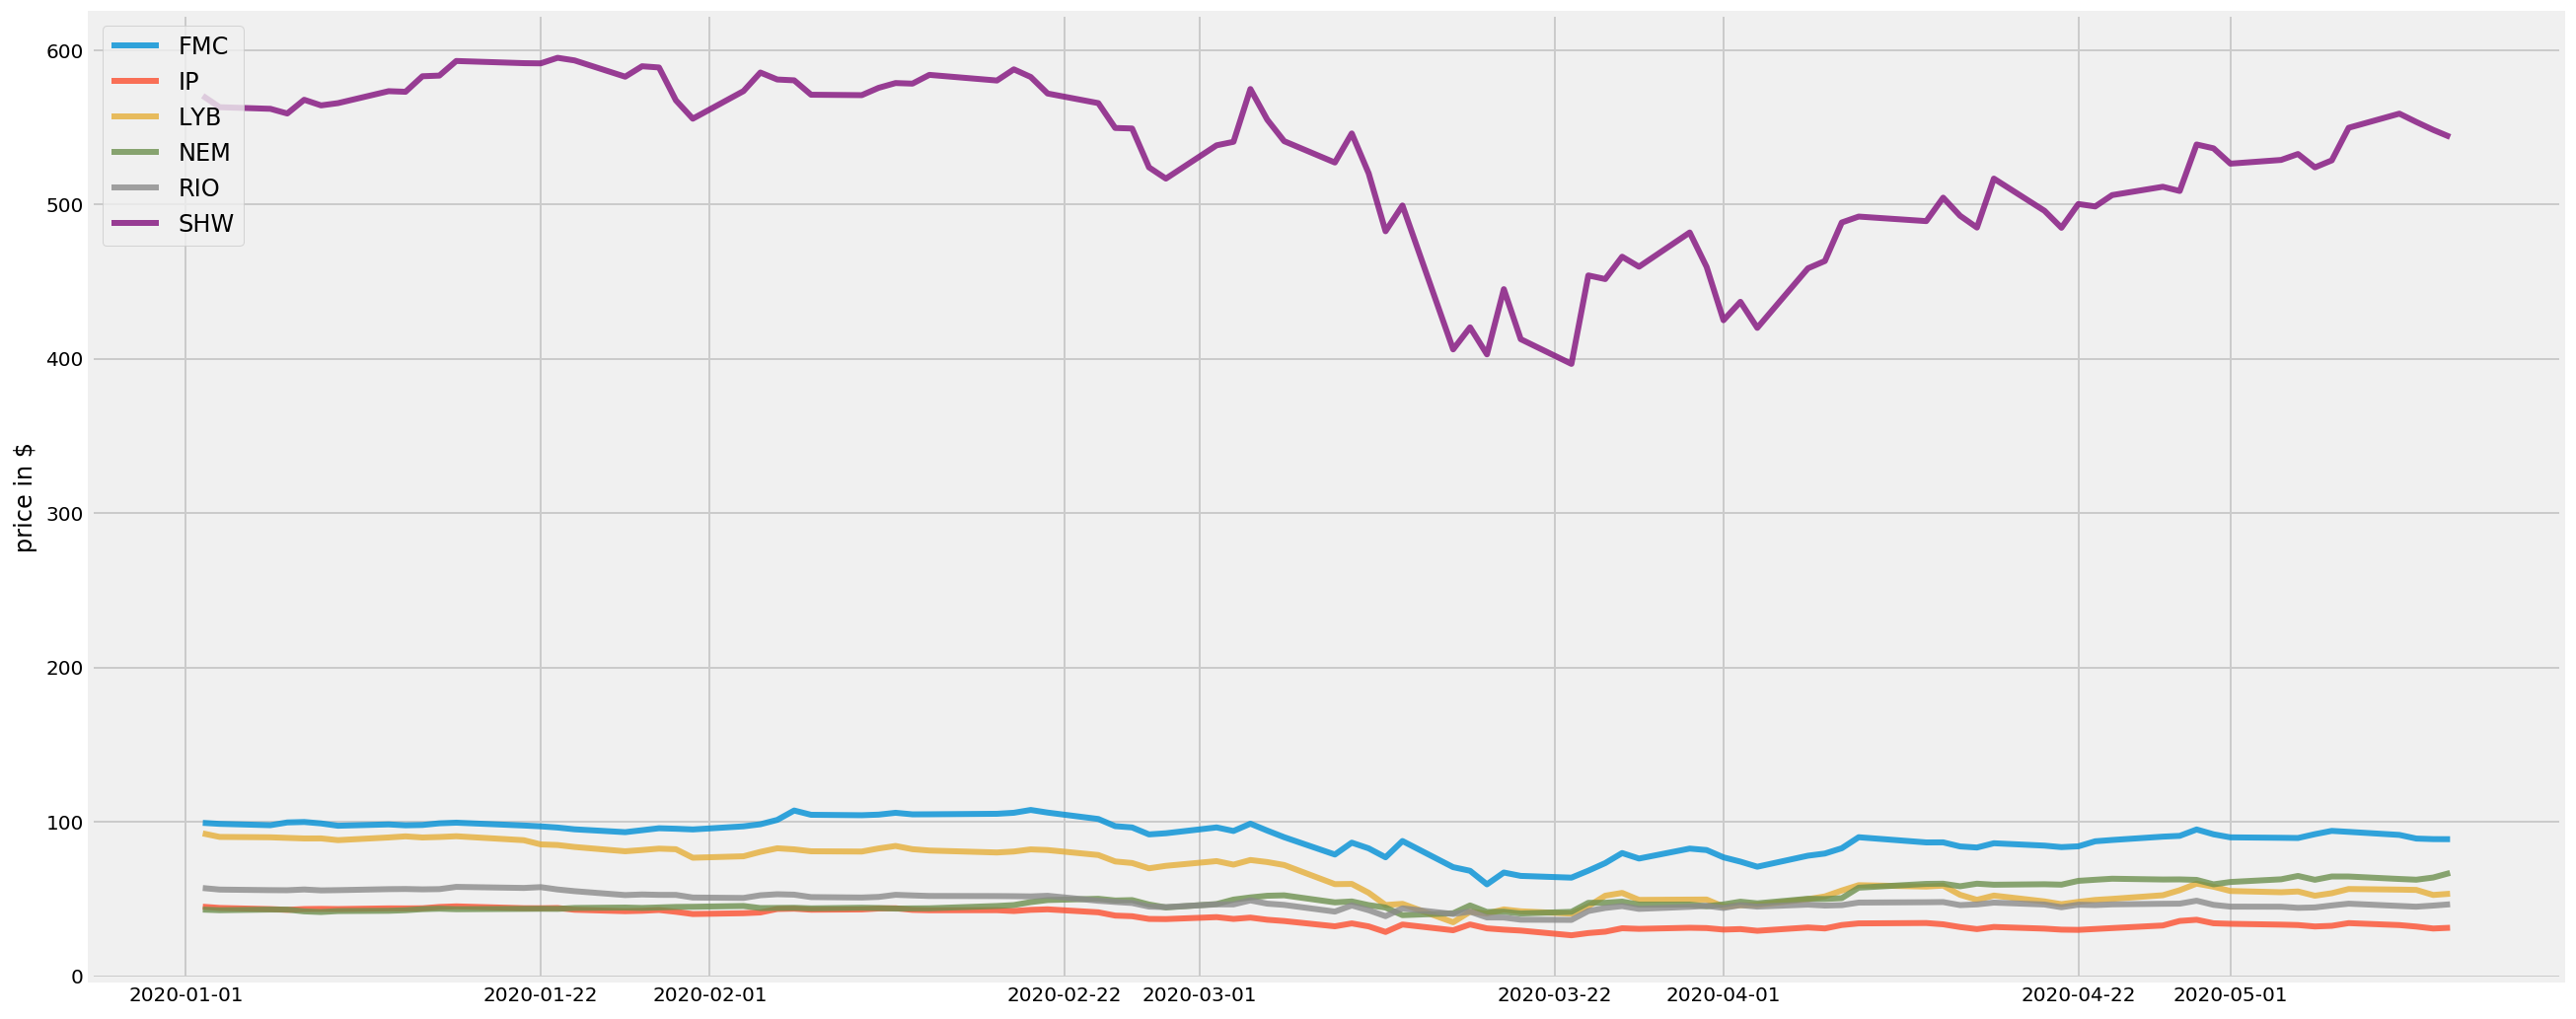

In [3]:
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

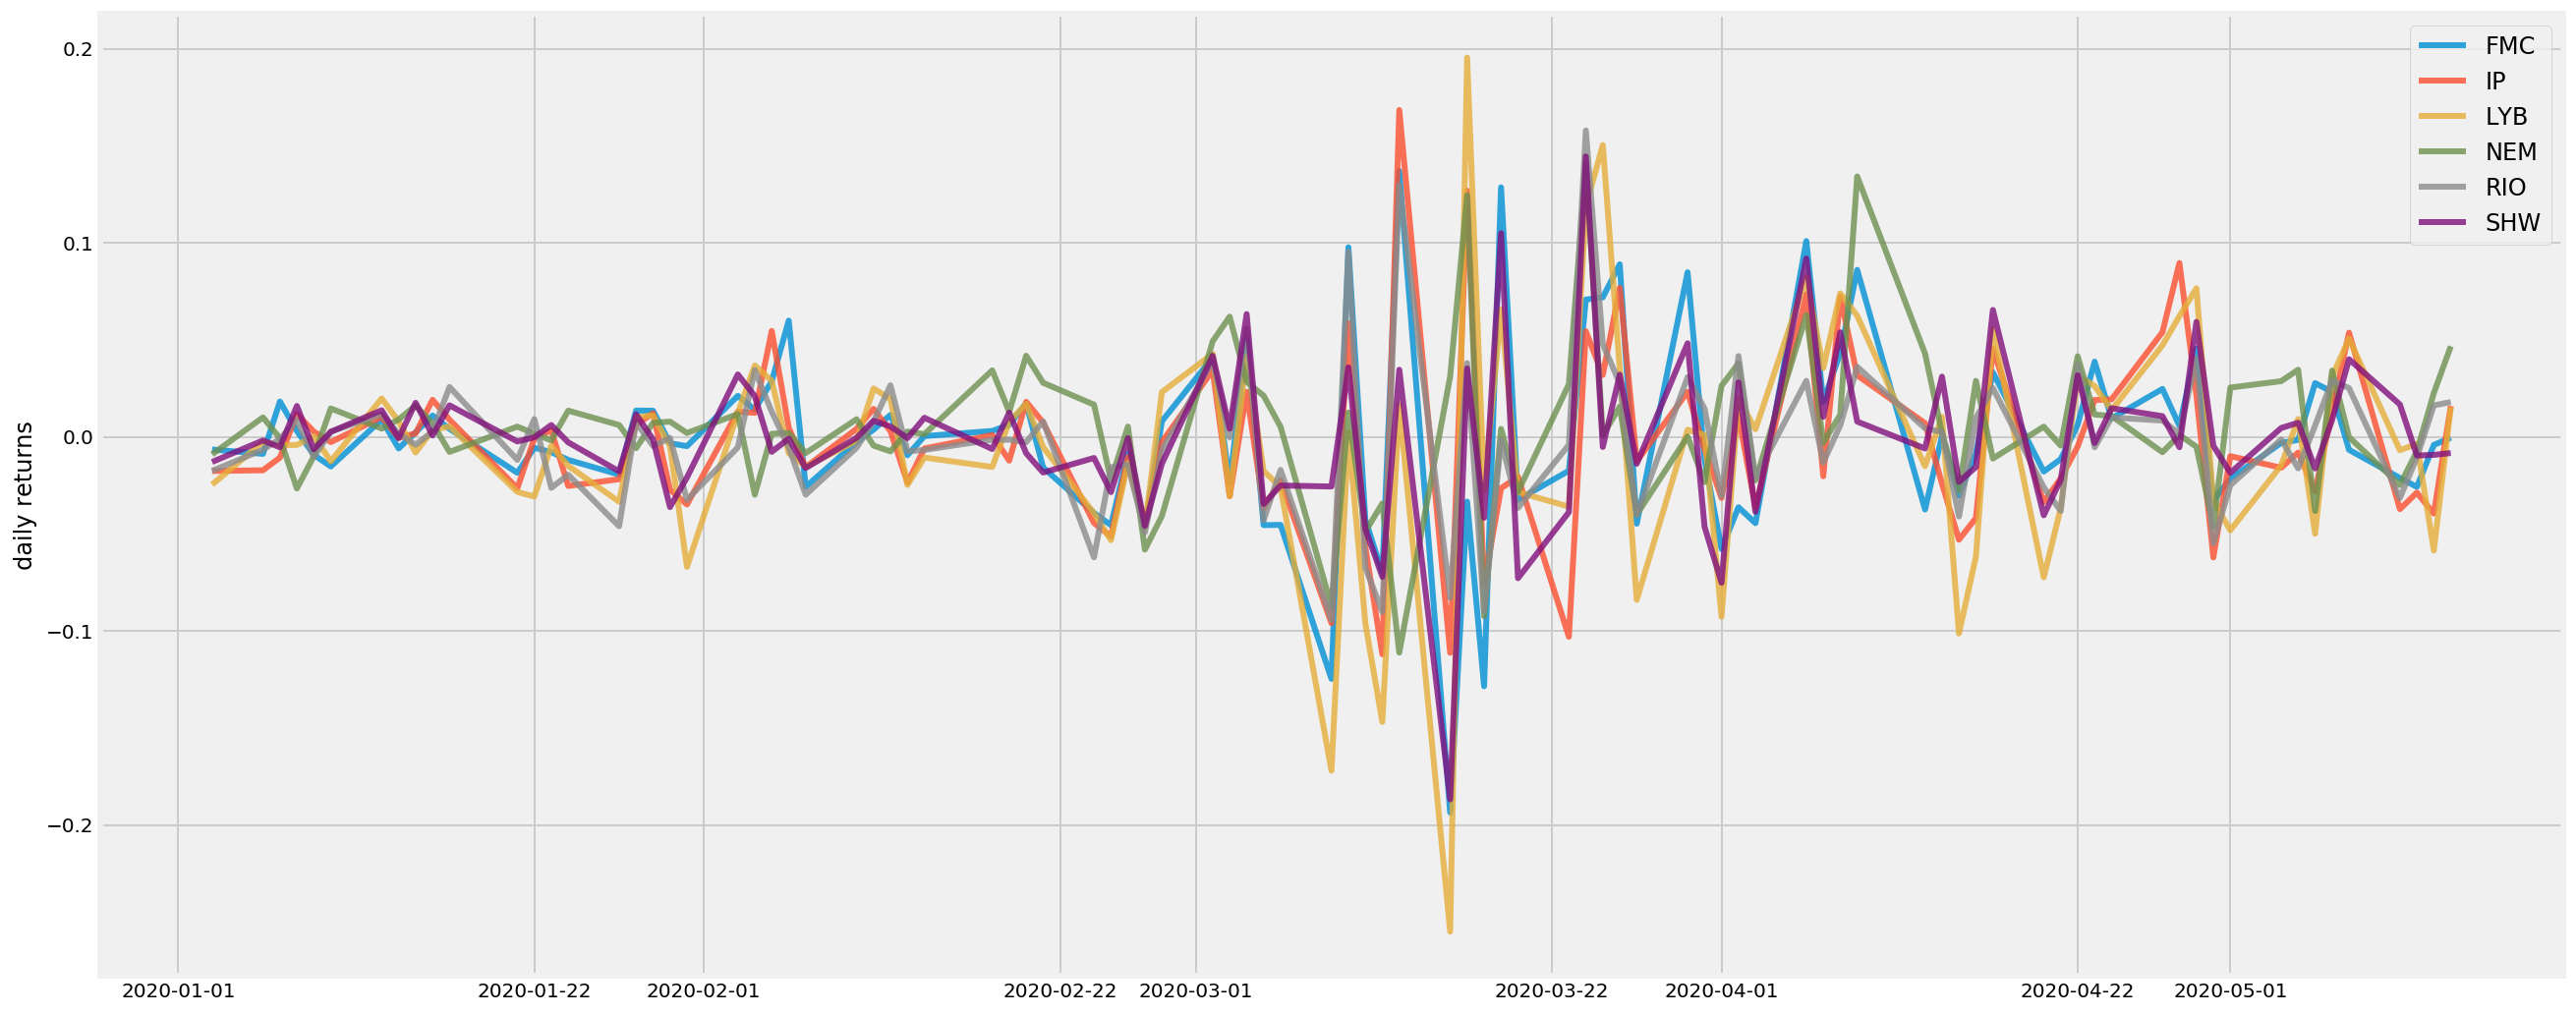

In [4]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### log returns

Text(0, 0.5, 'daily log returns')

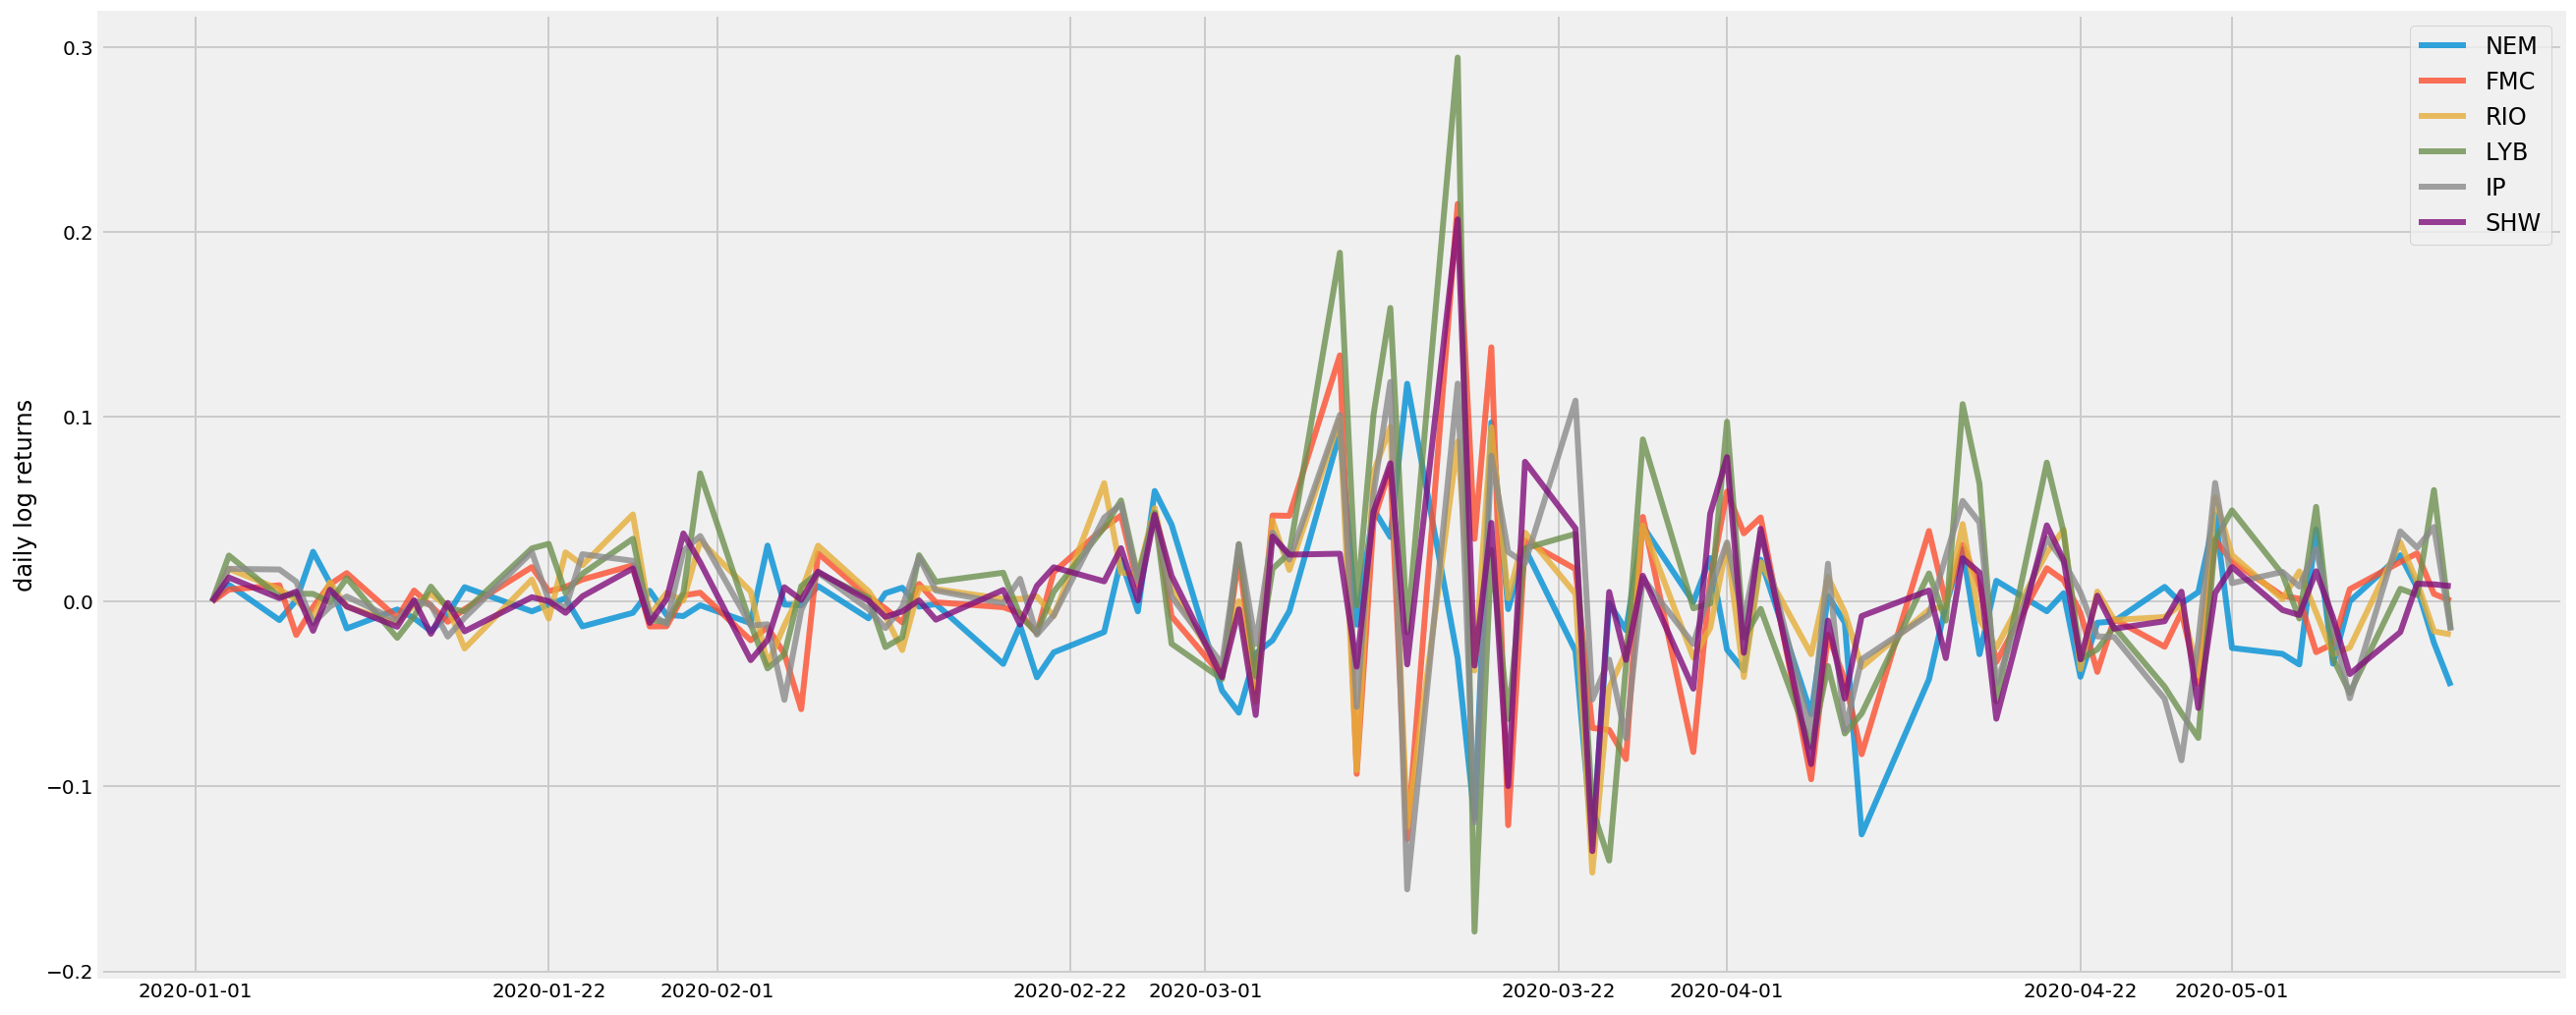

In [5]:
log = pd.DataFrame(columns = materials, index = table.index)

for i in range(len(materials)):
    log_list = []
    for j in range(len(table[materials[i]])):
        if(j+1<len(table[materials[i]])):
            log_returns =  np.log(table[materials[i]][j]) - np.log(table[materials[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[materials[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

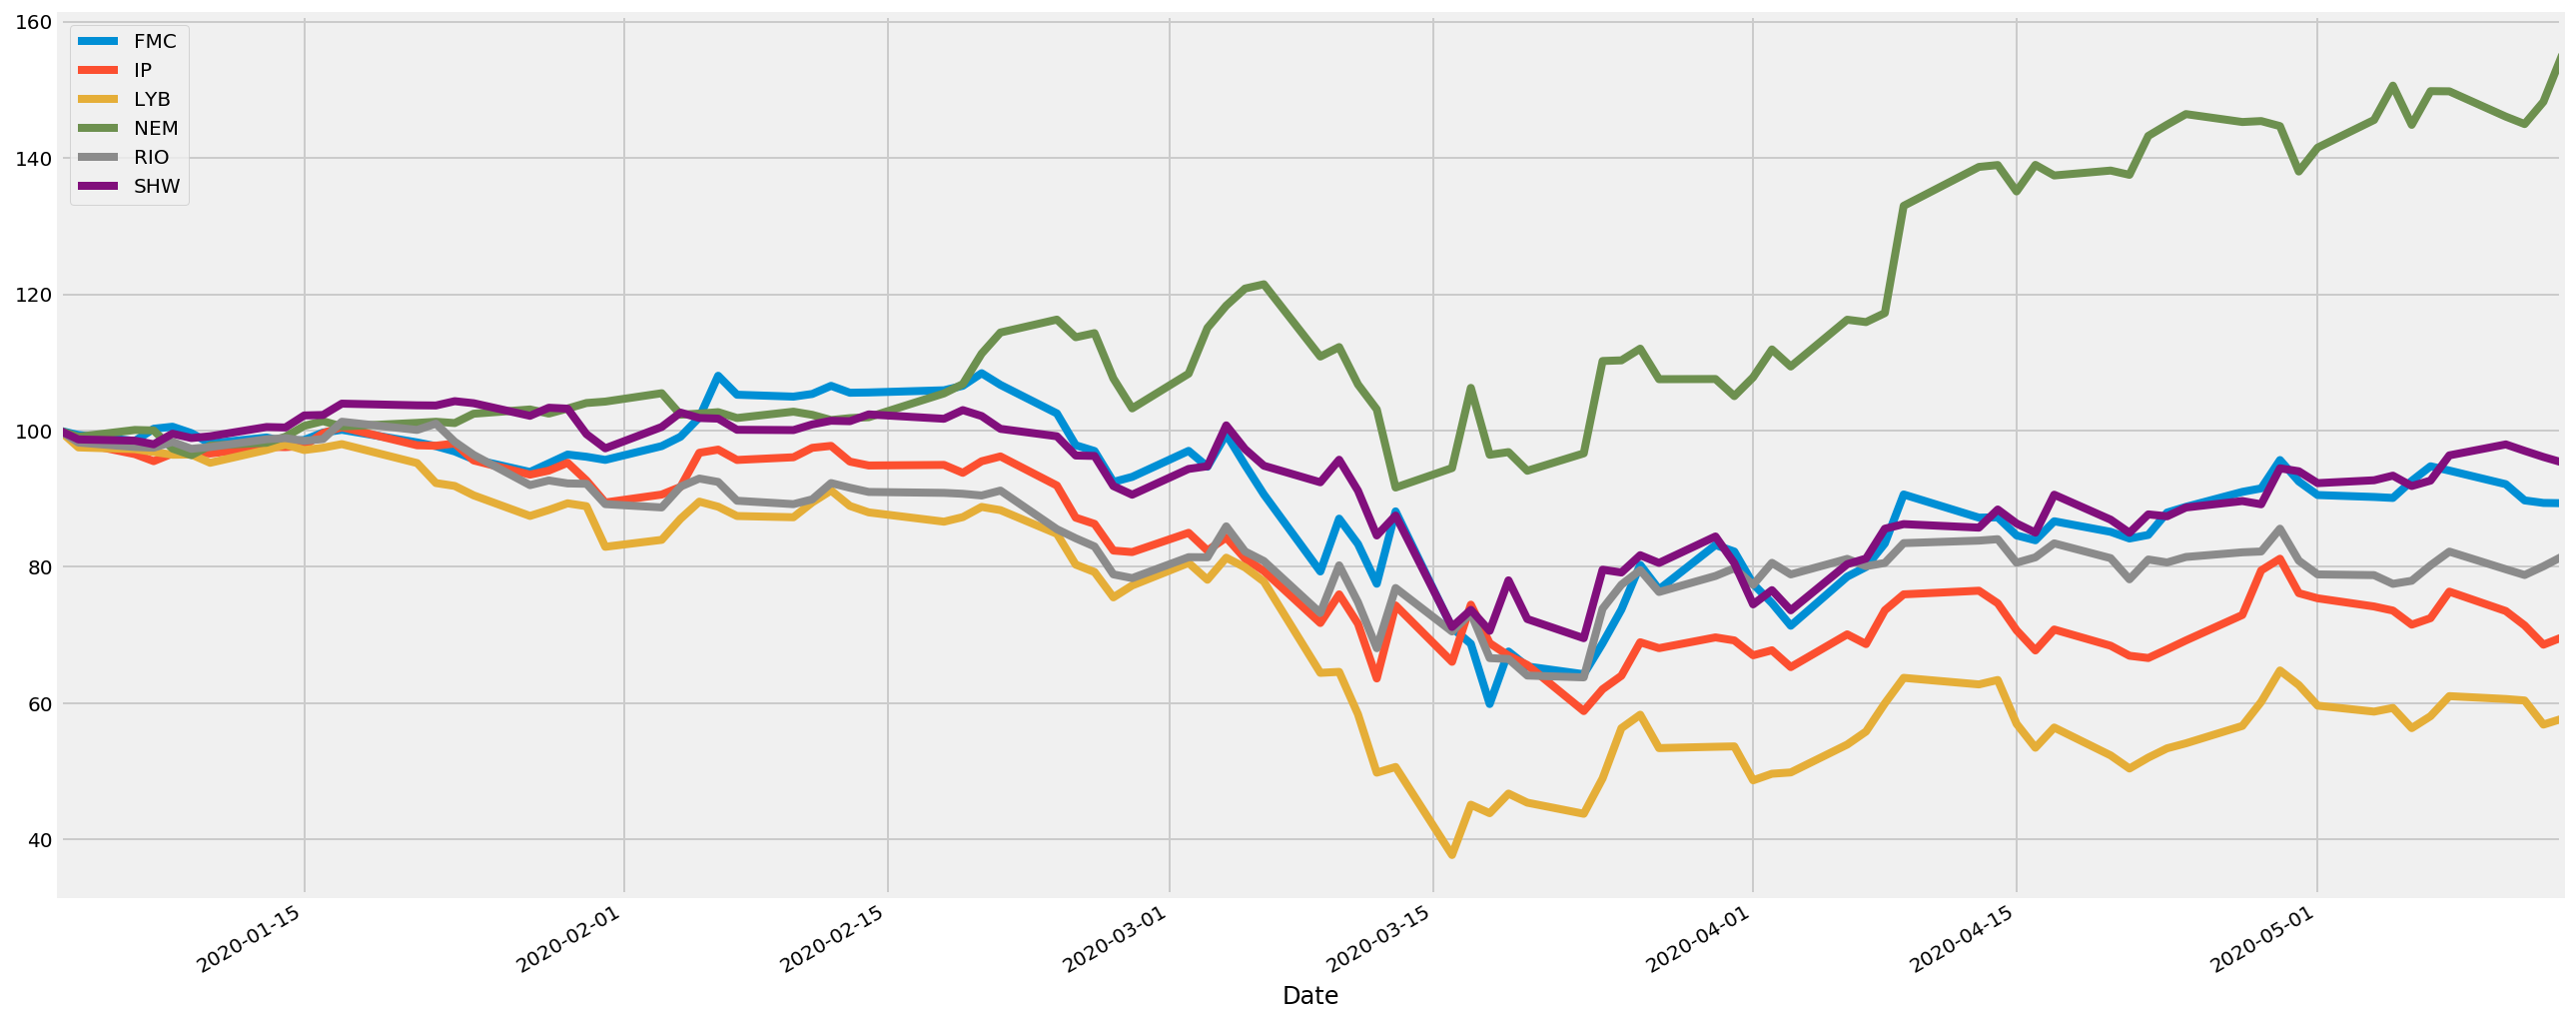

In [6]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

In [7]:
returns

,FMC,IP,LYB,NEM,RIO,SHW
Date,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.006508,-0.017575,-0.024611,-0.009024,-0.017532,-0.012940
2020-01-06,-0.008768,-0.017218,-0.002622,0.010040,-0.006628,-0.001843
2020-01-07,0.018198,-0.010694,-0.004271,-0.000693,-0.001027,-0.005413
2020-01-08,0.002995,0.011730,-0.004179,-0.026602,0.008734,0.015918
...,...,...,...,...,...,...
2020-05-08,-0.006694,0.053681,0.050624,-0.000155,0.025109,0.039958
2020-05-11,-0.021181,-0.037263,-0.006909,-0.024787,-0.031523,0.016664
2020-05-12,-0.025792,-0.028727,-0.003568,-0.007466,-0.010556,-0.009627


In [8]:
log.mean()*252

NEM   -1.190270
FMC    0.305143
RIO    0.553257
LYB    1.488065
IP     0.978686
SHW    0.129662
dtype: float64

In [9]:
log.std()*252**0.5

NEM    0.592792
FMC    0.774772
RIO    0.611004
LYB    0.966121
IP     0.701515
SHW    0.639374
dtype: float64